# Second tier CNN and feature extraction

### This file has the results of the secod tier CNN and the extraction of CNN features. The steps performed are:

1. This BSD is fed to a second-tier CNN and is trained for 150 epochs 
2. The CNN used has 4 convolutional layers having 32,64, 128 and 256 filters with filter size 3*3.  
3. From this CNN, the 3rd dense layer is selected for feature selection. 
4. 64 features of importance are selected by the CNN which is stored. 
5. These features are a result of a fully connected layer with 64 units (features) with ReLu as the activation function. 
6. Binary cross entropy is the loss function.


In [15]:
import tensorflow as tf
import keras

from keras import regularizers
from keras import backend as K

from keras.models import Sequential, Model

from keras.layers import *
from keras.optimizers import *

from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant


from keras.utils import np_utils
from keras_preprocessing.image import ImageDataGenerator


from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.applications import MobileNetV2

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [16]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.applications import MobileNetV2
import imageio
from keras.utils import to_categorical

The malignant and benign data is loaded to np arrays. 

In [17]:
xs = []
ys = []
def Load_data_malignant():
    path ="final/malignant"
    x_out = []
    y_out = []
    for i in range(1, 314):
        img = imageio.imread(path +'/' + '1' + ' (' + str(i) + ')' + '.jpg')
        lab = 1 
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out

In [18]:
def Load_data_benign():
    path ="final/benign"
    x_out = []
    y_out = []
    for i in range(1, 314):
        img = imageio.imread(path +'/' + '1' + ' (' + str(i) + ')' + '.jpg')
        lab = 0 
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out

The benign and malignant arrays are assigned to x and y arrays

In [19]:
x_0, y_0 = Load_data_benign()

In [20]:
x_1, y_1 = Load_data_malignant()

The arrays are concatenated to form x and y arrays (features, outputs)

In [21]:
x_0 = np.array(x_0)
y_0 = np.array(y_0)

x_1 = np.array(x_1)
y_1 = np.array(y_1)

In [22]:
num_classes = 2
x=np.concatenate((x_0, x_1), axis=0)
y=np.concatenate((y_0, y_1), axis=0)

y = np_utils.to_categorical(y, num_classes)

The data is split as train and test with 70:30 split

In [23]:
x_train, x_Test, y_train, y_Test = train_test_split(x, y, test_size=0.3, random_state=5,stratify=y)

In [24]:
x_train.shape

(438, 224, 224, 3)

The CNN model is defined below

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[224,224,3]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu',name ='feature_dense1'),
    keras.layers.Dense(128, activation='relu',name ='feature_dense2'),
    keras.layers.Dense(64, activation='relu',name ='feature_dense3'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
   ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 256)      

Optimizer is chosen as Adamax, binary cross entropy is the loss function, with epochs as 150

In [26]:
optimizer = keras.optimizers.Adamax()
model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

The model is fit to the data

In [27]:
history=model.fit(x_train, y_train, epochs=150,batch_size = 40 ,validation_data= (x_Test, y_Test), shuffle=True)

Epoch 1/150
11/11 [==============================] - 49s 4s/step - loss: 78.1600 - accuracy: 0.4840 - val_loss: 2.9758 - val_accuracy: 0.5000
Epoch 2/150
11/11 [==============================] - 48s 4s/step - loss: 1.6092 - accuracy: 0.5502 - val_loss: 0.6193 - val_accuracy: 0.5957
Epoch 3/150
11/11 [==============================] - 54s 5s/step - loss: 0.5985 - accuracy: 0.6735 - val_loss: 0.6021 - val_accuracy: 0.6702
Epoch 4/150
11/11 [==============================] - 51s 5s/step - loss: 0.5155 - accuracy: 0.7352 - val_loss: 0.4967 - val_accuracy: 0.7447
Epoch 5/150
11/11 [==============================] - 50s 5s/step - loss: 0.4460 - accuracy: 0.7785 - val_loss: 0.5173 - val_accuracy: 0.7287
Epoch 6/150
11/11 [==============================] - 49s 5s/step - loss: 0.4554 - accuracy: 0.7580 - val_loss: 0.5353 - val_accuracy: 0.7181
Epoch 7/150
11/11 [==============================] - 49s 5s/step - loss: 0.4215 - accuracy: 0.8196 - val_loss: 0.5111 - val_accuracy: 0.7394
Epoch 8/150


11/11 [==============================] - 48s 4s/step - loss: 2.5628e-06 - accuracy: 1.0000 - val_loss: 2.9866 - val_accuracy: 0.7340
Epoch 115/150
11/11 [==============================] - 48s 4s/step - loss: 2.4445e-06 - accuracy: 1.0000 - val_loss: 3.0037 - val_accuracy: 0.7287
Epoch 116/150
11/11 [==============================] - 47s 4s/step - loss: 2.4719e-06 - accuracy: 1.0000 - val_loss: 3.0042 - val_accuracy: 0.7287
Epoch 117/150
11/11 [==============================] - 47s 4s/step - loss: 2.3910e-06 - accuracy: 1.0000 - val_loss: 3.0167 - val_accuracy: 0.7340
Epoch 118/150
11/11 [==============================] - 47s 4s/step - loss: 2.2828e-06 - accuracy: 1.0000 - val_loss: 3.0084 - val_accuracy: 0.7340
Epoch 119/150
11/11 [==============================] - 47s 4s/step - loss: 2.1290e-06 - accuracy: 1.0000 - val_loss: 3.0354 - val_accuracy: 0.7340
Epoch 120/150
11/11 [==============================] - 54s 5s/step - loss: 2.1369e-06 - accuracy: 1.0000 - val_loss: 3.0320 - val_ac

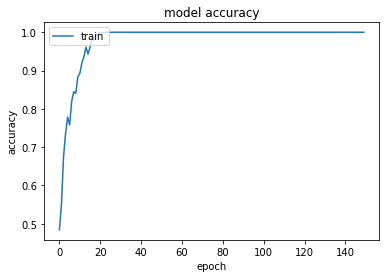

In [28]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

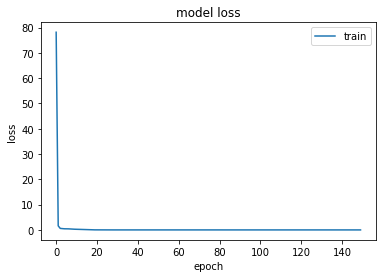

In [29]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [30]:
model.save('keras_model_conv2D_v2.h5')

In [32]:
from keras.models import load_model
import tensorflow as tf
import keras

from keras import regularizers
from keras import backend as K

from keras.models import Sequential, Model


model = load_model('keras_model_conv2D_v2.h5')

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('feature_dense3').output)
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [8]:
files=[]
for i in range(0,438):
    #print(filenames[i])
    files.append('train_generator\\'+str(i))
    
filenames=[]
for f in files:
    x=f.replace('\\',"/",1)
    filenames.append('final/train/'+ x)

In [9]:
new_col = []
for i in range(64):
    new_col.append('Feature_%d'%(i+1))

In [10]:
from PIL import Image
import numpy as np
from skimage import transform
import csv 

In [11]:
preds=[]
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

for f in filenames:
    image = load(f)
    files.append(f)
    pred=intermediate_layer_model.predict(image)
    preds.append(pred)

df = pd.DataFrame (preds)
filepath = 'new_data.xlsx'

df.to_excel(filepath, index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'final/train/train_generator/0'

In [ ]:
preds